TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
import random as rd

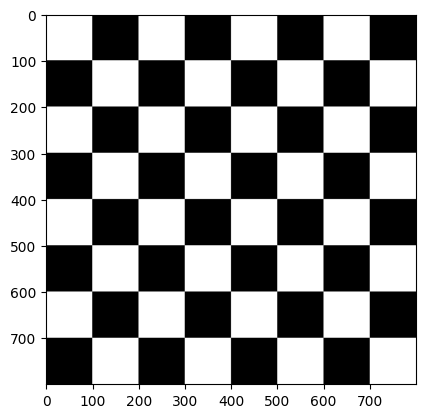

In [3]:
#Dimensiones de la imagen
ancho = 800
alto = 800

#Creacion de la imagen
tablero = np.zeros((alto, ancho, 1), dtype=np.uint8)

for i in range(0, alto, 100):
    for j in range(0, ancho, 100):
        if (i / 100) % 2 == 0:
            if (j / 100) % 2 == 0:
                tablero[i:i+100, j:j+100, 0] = 255
        else:
            if (j / 100) % 2 != 0:
                tablero[i:i+100, j:j+100, 0] = 255

plt.imshow(tablero, cmap="grey")
plt.show()

TAREA: Crear una imagen estilo Mondrian

In [4]:
def pintar_rectangulo(imagen, x, y, r, g, b):
    imagen[x[0]:x[1], y[0]:y[1], 0] = r
    imagen[x[0]:x[1], y[0]:y[1], 1] = g
    imagen[x[0]:x[1], y[0]:y[1], 2] = b

In [5]:
def pintar_mondrian(imagen, n_rectangulos):
    altura, ancho, n_canales = imagen.shape

    for i in range(n_rectangulos):
        x1 = rd.randint(0, altura)
        x2 = rd.randint(x1, altura)
        y1 = rd.randint(0, ancho)
        y2 = rd.randint(y1, ancho)

        r = rd.randint(0, 255)
        g = rd.randint(0, 255)
        b = rd.randint(0, 255)

        pintar_rectangulo(imagen, (x1, x2), (y1, y2), r, g, b)

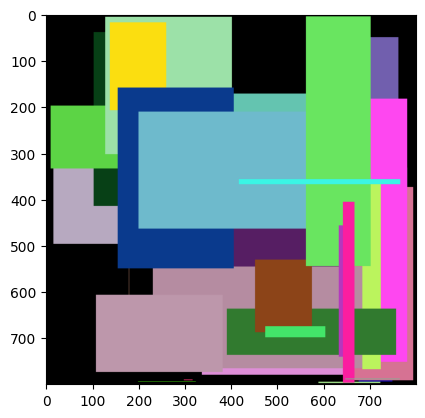

In [6]:
#Dimensiones de la imagen
ancho = 800
alto = 800

#Creacion de la imagen
mondrian = np.zeros((alto, ancho, 3), dtype=np.uint8)
pintar_mondrian(mondrian, 50)

plt.imshow(mondrian)
plt.show()

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

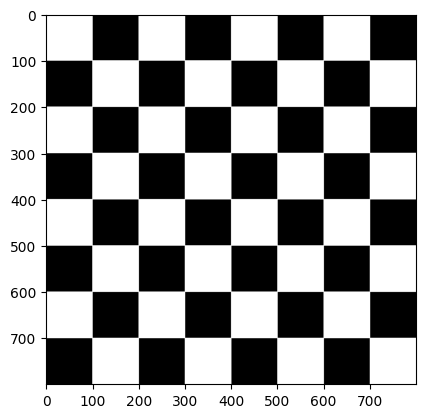

In [7]:
#Dimensiones de la imagen
ancho = 800
alto = 800

#Creacion de la imagen
tablero = np.zeros((alto, ancho, 1), dtype=np.uint8)

for i in range(0, alto, 100):
    for j in range(0, ancho, 100):
        if (i / 100) % 2 == 0:
            if (j / 100) % 2 == 0:
                cv2.rectangle(tablero, (i, j), (i + 100, j + 100), 255, -1)
        else:
            if (j / 100) % 2 != 0:
                cv2.rectangle(tablero, (i, j), (i + 100, j + 100), 255, -1)

plt.imshow(tablero, cmap="grey")
plt.show()

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [8]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[100:200,200:300,0]
        g = frame[100:200,200:300,1]
        r = frame[100:200,200:300,2]
        #Dimensiones imagen de entrada

        frame[100:150, 200:250, 0] = 255
        frame[100:150, 200:250, 1] = 255
        frame[100:150, 200:250, 2] = 255
        h, w, c = frame.shape

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [9]:
def buscar_minimo_maximo(imagen):
    ancho, altura, n_canales = imagen.shape

    pixel_minimo = (0, 0)
    valor_pixel_minimo = 255 * 3

    pixel_maximo = (0, 0)
    valor_pixel_maximo = 0
    
    for i in range(altura):
        for j in range(ancho):
            valor_pixel_actual = int(imagen[j, i, 0]) + int(imagen[j, i, 1]) + int(imagen[j, i, 2])
            if (valor_pixel_actual < valor_pixel_minimo):
                pixel_minimo = (i, j)
                valor_pixel_minimo = valor_pixel_actual
            if(valor_pixel_actual > valor_pixel_maximo):
                pixel_maximo = (i, j)
                valor_pixel_maximo = valor_pixel_actual
    
    return [pixel_minimo, pixel_maximo]

In [10]:
vid = cv2.VideoCapture("AyagauresResult.m4v")
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
  
    # Hay nuevo fotograma
    if ret:
        pixel_minimo, pixel_maximo = buscar_minimo_maximo(frame)
        # Se dibuja un circulo en el pixel de menor valor de la imagen
        cv2.circle(frame, pixel_minimo, 10, (255, 255, 255), -1)
        # Se dibuja un circulo en el pixel de mayor valor de la imagen
        cv2.circle(frame, pixel_maximo, 10, (0, 0, 0), -1)
        # Muestra fotograma
        cv2.imshow('Vid', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

In [38]:
def buscar_minimo_maximo_8x8(imagen):
    ancho, altura, n_canales = imagen.shape

    pixel_zona_minima = (0, 0)
    valor_zona_minima = (255 * 3) * (8 * 8)

    pixel_zona_maxima = (0, 0)
    valor_zona_maxima = 0

    for i in range(0, altura, 8):
        for j in range(0, ancho, 8):

            i_final = i + 8
            j_final = j + 8

            if i_final > altura:
                i_final = altura
            
            if j_final > ancho:
                j_final = ancho
            
            valor_zona_actual = 0
            for i_zona in range(i, i_final):
                for j_zona in range(j, j_final):
                    valor_zona_actual += int(imagen[j_zona, i_zona, 0]) + int(imagen[j_zona, i_zona, 1]) + int(imagen[j_zona, i_zona, 2])
            
            if (valor_zona_actual < valor_zona_minima):
                pixel_zona_minima = (i, j)
                valor_zona_minima = valor_zona_actual
            if(valor_zona_actual > valor_zona_maxima):
                pixel_zona_maxima = (i, j)
                valor_zona_maxima = valor_zona_actual
            
    return [pixel_zona_minima, pixel_zona_maxima]
            

In [39]:
vid = cv2.VideoCapture("AyagauresResult.m4v")
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
  
    # Hay nuevo fotograma
    if ret:
        zona_minima, zona_maxima = buscar_minimo_maximo_8x8(frame)
        # Se dibuja un rectángulo en la zona 8x8 de menor valor de la imagen
        cv2.rectangle(frame, zona_minima, (zona_minima[0] + 8, zona_minima[1] + 8), (255, 255, 255), -1)
        # Se dibuja un rectángulo en la zona 8x8 de mayor valor de la imagen
        cv2.rectangle(frame, zona_maxima, (zona_maxima[0] + 8, zona_maxima[1] + 8), (0, 0, 0), -1)
        # Muestra fotograma
        cv2.imshow('Vid', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Llevar a cabo una propuesta propia de pop art